 <font size=4>**Fourier Transforms**</font>

The Fourier transform is a mathematical formula that relates a signal sampled in time or space to the same signal sampled in frequency. In signal processing, the Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

The Fourier transform is defined for a vector $x$ with $n$ uniformly sampled points by

$$
y_{k+1} = \sum_{j=0}^{n-1} \omega^{jk} x_{j+1}.
$$

$\omega=e^{{-2 \pi i}/{n}}$is one of $n$ complex roots of unity where $i$ is the imaginary unit. For $x$ and $y$, the indices $j$ and $k$ range from $0$ to $n-1$.

The **fft** function in MATLAB® uses a fast Fourier transform algorithm to compute the Fourier transform of data. Consider a sinusoidal signal **x** that is a function of time **t** with frequency components of 15 Hz and 20 Hz. Use a time vector sampled in increments of $\frac 1 {50}$ of a second over a period of 10 seconds.

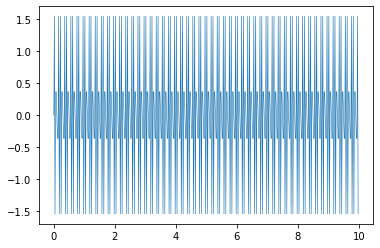

In [18]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,10,1/50)
x = np.sin(2*np.pi*15*t) + np.sin(2*np.pi*20*t)
plt.plot(t,x,linewidth=0.6)

Compute the Fourier transform of the signal, and create the vector **f** that corresponds to the signal's sampling in frequency space. 

In [19]:
from scipy import fft

y = fft.fft(x)
f = np.arange(len(y))*50/len(y)

When you plot the magnitude of the signal as a function of frequency, the spikes in magnitude correspond to the signal's frequency components of 15 Hz and 20 Hz.

Text(0.5, 1.0, 'Magnitude')

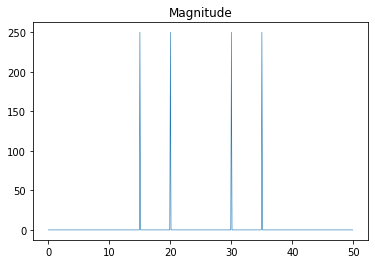

In [20]:
plt.plot(f,np.abs(y),linewidth=0.6)
plt.title('Magnitude')

The transform also produces a mirror copy of the spikes, which correspond to the signal's negative frequencies. To better visualize this periodicity, you can use the **fftshift** function, which performs a zero-centered, circular shift on the transform.

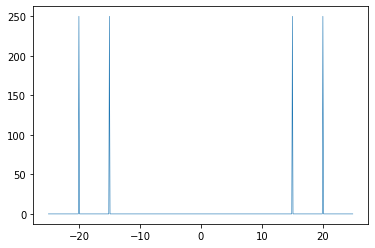

In [23]:
n = len(x)
fshift = np.arange(-n/2,n/2)*50/n
yshift = fft.fftshift(y)
plt.plot(fshift,np.abs(yshift),linewidth=0.6)

<font size=4>**Noisy Signals**</font>

In scientific applications, signals are often corrupted with random noise, disguising their frequency components. The Fourier transform can process out random noise and reveal the frequencies. For example, create a new signal, **xnoise**, by injecting Gaussian noise into the original signal, x.

In [24]:
xnoise = x + 2.5*np.random.randn(len(t))

Signal power as a function of frequency is a common metric used in signal processing. Power is the squared magnitude of a signal's Fourier transform, normalized by the number of frequency samples. Compute and plot the power spectrum of the noisy signal centered at the zero frequency.  Despite noise, you can still make out the signal's frequencies due to the spikes in power.

Text(0.5, 1.0, 'Power')

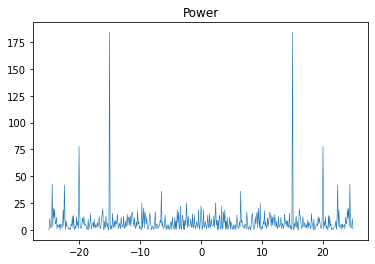

In [27]:
ynoise = fft.fft(xnoise)
ynoiseshift = fft.fftshift(ynoise)
power = np.square(np.abs(ynoiseshift))/n
plt.plot(fshift,power,linewidth=0.6)
plt.title('Power')

<font size=4>**Computational Efficiency**</font>

Using the Fourier transform formula directly to compute each of the $n$ elements of $y$ requires on the order of $n^2$ floating-point operations. The fast Fourier transform algorithm requires only on the order of $n\log n$ operations to compute. This computational efficiency is a big advantage when processing data that has millions of data points. Many specialized implementations of the fast Fourier transform algorithm are even more efficient when $n$ is a power of 2.

Consider audio data collected from underwater microphones off the coast of California. This data can be found in a library maintained by the [Cornell University Bioacoustics Research Program](https://www.birds.cornell.edu/ccb). Load and format a subset of the data in **bluewhale.au**, which contains a Pacific blue whale vocalization. You can use the command **sound(x,fs)** to listen to the entire audio file.

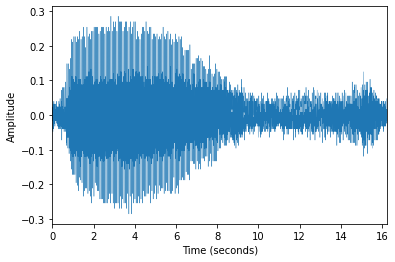

In [127]:
from scipy.io import loadmat

audio_bw = loadmat('bluewhale.mat')
x = audio_bw['x'];fs = audio_bw['fs']
whaleMoan = x[24500-1:31000]
t = 10*np.arange(0,len(whaleMoan)/fs,1/fs)

plt.plot(t,whaleMoan,linewidth=0.4)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.autoscale(tight=True,axis='x')

Specify a new signal length that is the next power of 2 greater than the original length. Then, use **fft** to compute the Fourier transform using the new signal length.**fft** automatically pads the data with zeros to increase the sample size. This padding can make the transform computation significantly faster, particularly for sample sizes with large prime factors.

In [152]:
m = len(whaleMoan)
n = np.power(2,(np.ceil(np.log2(m))))
y = fft.fft(whaleMoan.flatten(),int(n))

Plot the power spectrum of the signal. The plot indicates that the moan consists of a fundamental frequency around 17 Hz and a sequence of harmonics, where the second harmonic is emphasized.

Text(0, 0.5, 'Power')

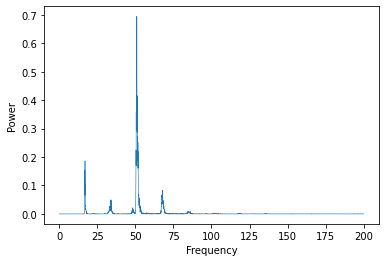

In [168]:
f = (np.arange(n)*(fs/n)/10).flatten()
power = np.square(np.abs(y))/n
plt.plot(f[:int(np.floor(n/2)+1)],power[:int(np.floor(n/2)+1)],linewidth=0.6)
plt.xlabel('Frequency')
plt.ylabel('Power')

Copyright 2012 The MathWorks, Inc.